In [89]:
%matplotlib notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.linalg import svd, inv
import seaborn as sns
from sklearn.decomposition import PCA

In [26]:
path = r"D:\MyProjects\Python\Andrew Ng_ML_Exercise\python代码\ex7-kmeans and PCA\data\ex7data1.mat"
raw_data = loadmat(path)
raw_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

### plot raw data

In [27]:
data = raw_data.get('X')
X = data - data.mean(axis=0)

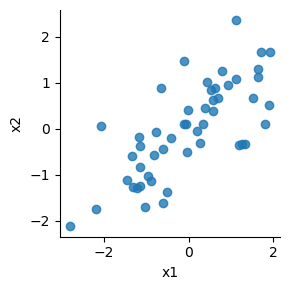

In [44]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
sns.lmplot(x='x1', y='x2', data=df, fit_reg=False, height=3)

In [94]:
m = X.shape[0]
cov_matrix = (1 / m) * X.T @ X
cov_matrix

array([[1.34852518, 0.86535019],
       [0.86535019, 1.02641621]])

In [98]:
U, s, Vt = svd(cov_matrix)
U

array([[-0.76908153, -0.63915068],
       [-0.63915068,  0.76908153]])

In [91]:
k = 1
X_prj = X @ U[:, 0:k]
X_prj[:5, :]

array([[ 1.49876595],
       [-0.95839024],
       [ 1.40325172],
       [ 1.76421694],
       [ 1.40760243]])

In [92]:
ori_X = np.insert(X_prj, obj=1, axis=1, values=0)
X_rec = ori_X @ inv(U)
X_rec[:5, :]

array([[-1.15267321, -0.95793728],
       [ 0.73708023,  0.61255577],
       [-1.07921498, -0.89688929],
       [-1.35682667, -1.12760046],
       [-1.08256103, -0.89967005]])

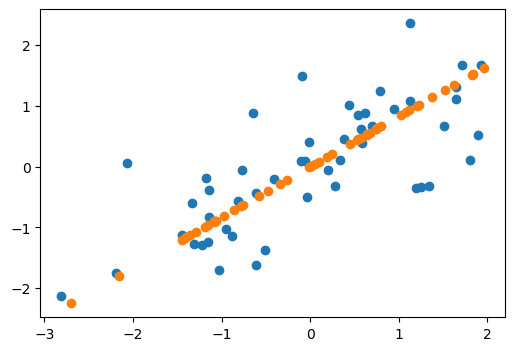

In [93]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X[:, 0], X[:, 1])
ax.scatter(X_rec[:, 0], X_rec[:, 1])

### use sklearn.decomposition.PCA

In [96]:
pca = PCA(n_components=1)
pca.fit(data)

PCA(n_components=1)

In [97]:
pca.components_

array([[-0.76908153, -0.63915068]])

In [99]:
pca.explained_variance_

array([2.10987818])

In [103]:
pca.get_covariance()

array([[1.3760461 , 0.8830104 ],
       [0.8830104 , 1.04736348]])

In [104]:
coords = pca.transform(data)
pca.transform(data)[:5,:]

array([[ 1.49876595],
       [-0.95839024],
       [ 1.40325172],
       [ 1.76421694],
       [ 1.40760243]])

In [111]:
sk_X_rec = pca.inverse_transform(coords)
sk_X_rec = sk_X_rec-np.mean(sk_X_rec,axis=0)

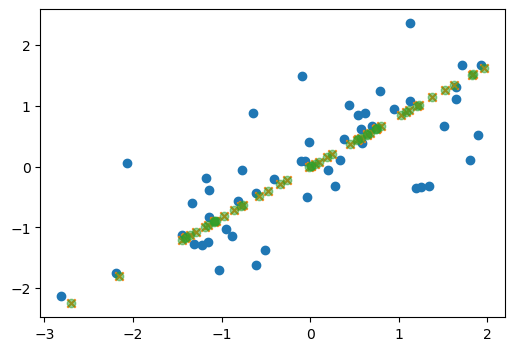

In [118]:
fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(X[:,0],X[:,1])
ax.scatter(sk_X_rec[:,0], sk_X_rec[:,1],marker='x',)
ax.scatter(X_rec[:,0], X_rec[:,1],marker='o',alpha=0.5)